# Logistic Regression

## Part 1: Exploratory Data Analysis

### 1.1 Import Libraries and Load data

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve

In [2]:
#Loading the data
spambase= pd.read_csv('spambase.csv')

### 1.2 Do a quick check of the data and print out the following information about the data

#### 1.2.1 Look at top 5 rows 

In [3]:
spambase.head(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


#### 1.2.2 Get a description of the data 

In [4]:
spambase.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [5]:
spambase.corr()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,1.000000,-0.016735,0.065684,0.013270,0.023120,0.059650,0.007647,-0.003970,0.106241,0.041171,...,-0.026517,-0.021235,-0.033313,0.058342,0.117398,-0.008852,0.044488,0.061387,0.089165,0.126323
0.64,-0.016735,1.000000,-0.033579,-0.006920,-0.023761,-0.024815,0.003939,-0.016261,-0.003803,0.032989,...,-0.007270,-0.049802,-0.018516,-0.014506,-0.009584,0.001953,0.002086,0.000268,-0.022679,-0.030318
0.64.1,0.065684,-0.033579,1.000000,-0.020240,0.077737,0.087624,0.036725,0.012044,0.093843,0.032135,...,-0.033190,-0.016417,-0.033098,0.108054,0.087671,-0.003320,0.097410,0.107462,0.070119,0.196840
0.1,0.013270,-0.006920,-0.020240,1.000000,0.003238,-0.010018,0.019781,0.010265,-0.002458,-0.004951,...,-0.000592,-0.012376,-0.007150,-0.003132,0.010859,-0.000299,0.005260,0.022081,0.021369,0.057394
0.32,0.023120,-0.023761,0.077737,0.003238,1.000000,0.054055,0.147338,0.029599,0.020824,0.034497,...,-0.032759,-0.046361,-0.026389,0.025509,0.041583,0.002016,0.052662,0.052290,0.002492,0.241958
0.2,0.059650,-0.024815,0.087624,-0.010018,0.054055,1.000000,0.061142,0.079543,0.117416,0.013869,...,-0.019131,-0.008745,-0.015145,0.065094,0.105671,0.019887,-0.010282,0.090177,0.082089,0.232741
0.3,0.007647,0.003939,0.036725,0.019781,0.147338,0.061142,1.000000,0.044530,0.050767,0.056787,...,-0.033099,-0.051919,-0.027663,0.053748,0.070109,0.046606,0.041563,0.059680,-0.008344,0.332255
0.4,-0.003970,-0.016261,0.012044,0.010265,0.029599,0.079543,0.044530,1.000000,0.105285,0.083110,...,-0.027441,-0.032525,-0.019557,0.031491,0.057894,-0.008018,0.011251,0.037578,0.040252,0.206915
0.5,0.106241,-0.003803,0.093843,-0.002458,0.020824,0.117416,0.050767,0.105285,1.000000,0.130601,...,-0.014657,-0.031040,0.013591,0.043685,0.149347,-0.000530,0.111306,0.189252,0.248726,0.231680
0.6,0.041171,0.032989,0.032135,-0.004951,0.034497,0.013869,0.056787,0.083110,0.130601,1.000000,...,0.011933,0.003895,0.007345,0.036789,0.075763,0.044822,0.073674,0.103314,0.087274,0.139088


#### 1.2.3 Get dimension of data 

In [6]:
#printing dimentions of the data
print("Dimension of the data: ", spambase.shape)
no_of_rows = spambase.shape[0]
no_of_columns = spambase.shape[1]
print("No. of Rows: %d" % no_of_rows)
print("No. of Columns: %d" % no_of_columns)

Dimension of the data:  (4600, 58)
No. of Rows: 4600
No. of Columns: 58


#### 1.2.4 Get the class distribution 

In [7]:
#Counting the number of spam and not spam in the database to create a distribution
class_counts = spambase.iloc[:, -1].value_counts()
print('Class distribution:')
print('Spam:', class_counts[1])
print('Not Spam:', class_counts[0])

Class distribution:
Spam: 1812
Not Spam: 2788


#### 1.2.5 generate a bar plot to display the class distribution. You may use “seaborn”s barplot function.

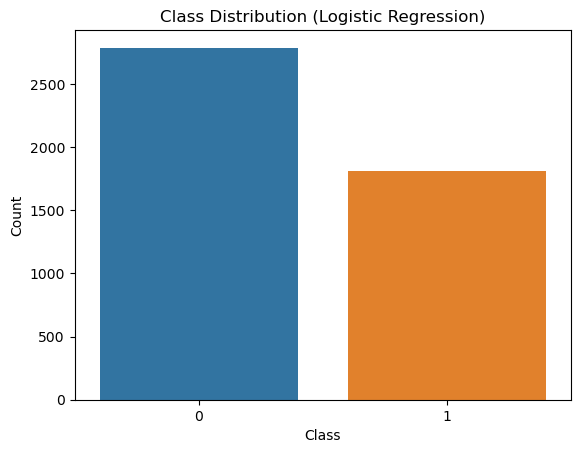

In [8]:
#Based on the spam database documentation spam (1) or not spam (0)
#This is reflected in the list shown below named classes
classes = [0,1]

#I am creating a new dataframe to describe the class distribution and then plot it using seaborn
class_dist = pd.DataFrame({'Class': classes, 'Count': class_counts})

# Create bar plot
plt.title('Class Distribution (Logistic Regression)')
sns.barplot(x='Class', y='Count', data=class_dist)

# Show plot
plt.show()

#### 1.2.6 create a separate feature set (Data Matrix X) and Target (1D Vector y) and print dimension of each. 

In [9]:
#creating different dataframes. X is related to the Features and y is the Target 
y=spambase.iloc[:,-1]
X=spambase.iloc[:,0:-1]

In [10]:
X.shape

(4600, 57)

In [11]:
y.shape

(4600,)

#### 1.2.7 Create Train and Test Dataset.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
X_train.shape

(3680, 57)

In [14]:
y_test.shape

(920,)

## Part 2: Train the Logistic Regression model

In [15]:
#Instantiating and training logistic regression model
lr=LogisticRegression()
lr.fit(X_train, y_train)

/opt/anaconda3/envs/MLClassEnv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Part 3: Analyze Model Performance

### 3.1 Evaluate the model using ROC Curve for the Training Data using sklearn metrics.roc_curve() with two parameters: true binary labels and target scores. Plot the ROC Curve and determine the optimal threshold

For the NB classifier, use the probability estimates of the spam emails as the target score.
There are two steps to obtain the probability estimates of the spam class: 

• The NB model's predict_proba() function.
• The model_selection.cross_val_predict() function in which need to use the attribute "method" with the value "predict_proba" as: method="predict_proba". Both functions will return a n X 2 matrix (n = # of data). The second column of this matrix stores the probability of the spam class.
So you need to retrieve the values from the 2nd column of the values from the 2nd column of the returned matrix to get the
probability estimates of the spam class (target score values).

In [16]:
#Using a cross validation to predict the probabilities of the training data
train_proba_cv = cross_val_predict(lr, X_train, y_train,method='predict_proba', cv=5)

#Choosing the second column containing the predicted probabilities
y_train_cv_score = train_proba_cv[:, 1]

#getting the rates and tresholds
fpr, tpr, thresholds = roc_curve(y_train, y_train_cv_score)

/opt/anaconda3/envs/MLClassEnv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/MLClassEnv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [17]:
fpr.shape

(573,)

In [18]:
tpr.shape

(573,)

In [19]:
thresholds.shape

(573,)

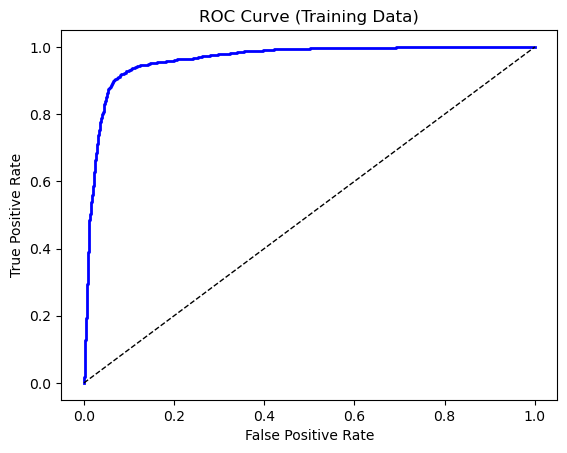

In [20]:
#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr, tpr, color='blue', linewidth=2) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### 3.2 Compute and print the AUC 

In [21]:
from sklearn.metrics import roc_auc_score
#Area under ROC curve
roc_auc_score(y_train, y_train_cv_score)

0.9631827063181039

### 3.3 Plot the precision and recall curve as functions of threshold values

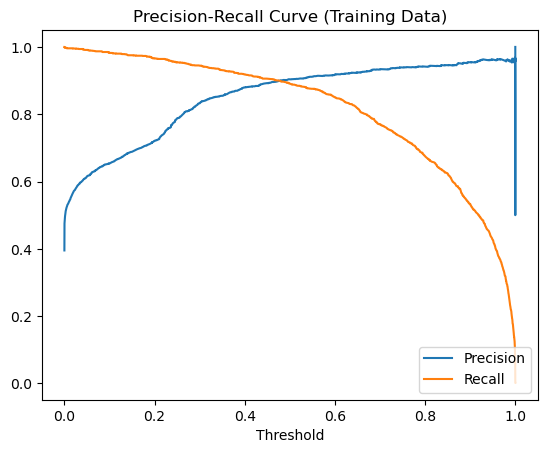

In [22]:
#getting the precision and recall values
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_cv_score)

#plotting the curve
plt.plot(thresholds, precisions[:-1], label="Precision") 
plt.plot(thresholds, recalls[:-1], label="Recall") 
plt.xlabel("Threshold")
plt.title('Precision-Recall Curve (Training Data)')
plt.legend(loc="lower right")

plt.show()

## Part 4: Evaluate the model on Test Data

### 4.1 Compute and print the confusion matrix for test data.

In [23]:
y_test_pred = lr.predict(X_test)

# Confusion Matrix
print(f"Confusion Matrix (Test Data):\n {confusion_matrix(y_test, y_test_pred)}")

Confusion Matrix (Test Data):
 [[532  30]
 [ 46 312]]


### 4.2 Compute and print the test precision.

In [24]:
precision = precision_score(y_test, y_test_pred) 
print(f"Precision = {precision}")

Precision = 0.9122807017543859


### 4.3 Compute and print the test recall.

In [25]:
recall = recall_score(y_test, y_test_pred)
print(f"Recall = {recall}")

Recall = 0.8715083798882681


### 4.4 Compute and print the test F1 score.

In [26]:
f1 = f1_score(y_test, y_test_pred)
print(f"F1 Score = {f1}")

F1 Score = 0.8914285714285715


## Extra Experiments

In [27]:
#trying a different approach hoping to improve prediction and fix warining values from part 2 and part 3.1

In [28]:
#I am normalizing the data to see if it improves the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)  # compute minimum and maximum on the training data
X_scaled2 = scaler.transform(X)

In [29]:
X_train_scaled2, X_test_scaled2, y_train_scaled2, y_test_scaled2 = train_test_split(X_scaled2, y, test_size=0.2)

In [30]:
#training the data with the scaled data
lr=LogisticRegression()
lr.fit(X_train_scaled2, y_train_scaled2)

LogisticRegression()

In [31]:
#predicting probabilities for the ROC curve
train_proba_cv2 = cross_val_predict(lr, X_train_scaled2, y_train_scaled2,method='predict_proba', cv=5)
y_train_cv_score2 = train_proba_cv2[:, 1]

#I am using the y_train_score2 to build the ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y_train_scaled2, y_train_cv_score2)

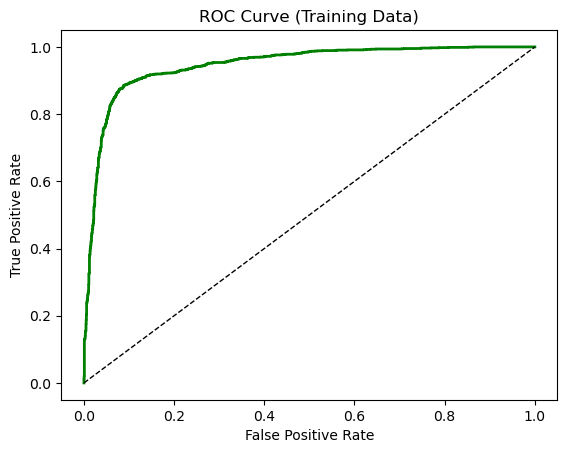

In [32]:
#plotting the ROC Curve using fpr and tpr values
plt.plot(fpr2, tpr2, color='green', linewidth=2) 
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.title('ROC Curve (Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
#Area under ROC curve
roc_auc_score(y_train_scaled2, y_train_cv_score2)

0.9457983796527367

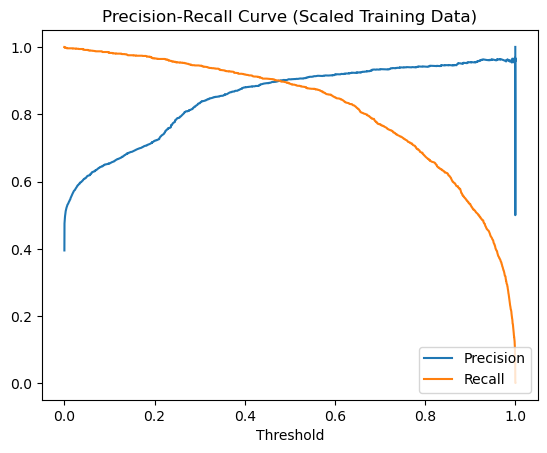

In [34]:
#getting the precision and recall values
precisions2, recalls2, thresholds2 = precision_recall_curve(y_train, y_train_cv_score)

#plotting the curve
plt.plot(thresholds2, precisions2[:-1], label="Precision") 
plt.plot(thresholds2, recalls2[:-1], label="Recall") 
plt.xlabel("Threshold")
plt.title('Precision-Recall Curve (Scaled Training Data)')
plt.legend(loc="lower right")

plt.show()

In [35]:
y_test_pred2 = lr.predict(X_test_scaled2)

# Confusion Matrix
print(f"Confusion Matrix (Test Data):\n {confusion_matrix(y_test_scaled2, y_test_pred2)}")

Confusion Matrix (Test Data):
 [[539  35]
 [ 62 284]]


In [36]:
precision2 = precision_score(y_test_scaled2, y_test_pred2) 
print(f"Precision = {precision2}")

Precision = 0.890282131661442


In [37]:
recall2 = recall_score(y_test_scaled2, y_test_pred2)
print(f"Recall = {recall2}")

Recall = 0.8208092485549133
